# Part 1: Let's get started
## Importing some libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Some useful helper functions

In [2]:
def visualize_digit(img):
    """
    Display the vector as a 28*28 grayscale image.
    """
    img = img.reshape((28,28))
    plt.imshow(img, cmap="gray")
    plt.show()

In [3]:
def vectoried_generate_onehot_vector(labels):
    """
    Returns the onehot encoding of the labels. This is a vectorized version of the function.
    """
    onehot = np.zeros((len(labels), 10))
    onehot[np.arange(len(labels)), labels] = 1
    return onehot

In [4]:
def generate_onehot_vector(labels):
    """
    Returns the onehot encoding of the labels.
    """
    num_samples = len(labels)
    onehot = np.zeros((num_samples, 10))
    for i in range(num_samples):
        label = labels[i]
        onehot[i, label] = 1
    return onehot

## Loading training set and testing set
The dataset we are working with in this tutorial is the MNIST handwritten digit dataset.
There are 60000 training examples and 10000 testing examples. We will only use 20000 of the trainig examples and 2000 of the testing examples.

In [5]:
X_train = np.load("X_train.npy")[:20000,:]
y_train = np.load("y_train.npy")[:20000]
X_test = np.load("X_test.npy")[:2000,:]
y_test = np.load("y_test.npy")[:2000]

## Change the labels to one hot vector

In [6]:
y_train_onehot = generate_onehot_vector(y_train)
y_test_onehot = vectoried_generate_onehot_vector(y_test)

# Part 2: Setting up the neural network

In this tutorial, we will use a neural network with three fully connected hidden layers. We will explore how different hyperparamter choices affect the performance of our neural network. Let's first set up some hyperparameters for our net.

In [7]:
learning_rate = 0.1
iterations = 1000
layer_1_nodes = 150
layer_2_nodes = 150
layer_3_nodes = 150
layer_4_nodes = 10

## Setting up neural network
tf.placeholder is a variable to which we will assign values to at the later stage.

In [8]:
X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.float32, shape=[None, 10])

Let's add the layers of our neural net to our ["Computational Graph"]([https://www.tensorflow.org/programmers_guide/graphs)

In [9]:
w1 = tf.Variable(tf.random_normal(shape=[784, layer_1_nodes], 
                                           dtype=tf.float32,
                                           stddev=1e-1),
                                           name="weights1")
b1 = tf.Variable(tf.constant(0.0, shape=[layer_1_nodes], dtype=tf.float32), name="biases1")

layer_1_output = tf.nn.relu(tf.matmul(X, w1) + b1)


w2 = tf.Variable(tf.random_normal(shape=[layer_1_nodes, layer_2_nodes], 
                                           dtype=tf.float32,
                                           stddev=1e-1),
                                           name="weights2")
b2 = tf.Variable(tf.constant(0.0, shape=[layer_2_nodes], dtype=tf.float32), name="biases2")

layer_2_output = tf.nn.relu(tf.matmul(layer_1_output, w2) + b2)


w3 = tf.Variable(tf.random_normal(shape=[layer_2_nodes, layer_3_nodes], 
                                           dtype=tf.float32,
                                           stddev=1e-1),
                                           name="weights3")
b3 = tf.Variable(tf.constant(0.0, shape=[layer_3_nodes], dtype=tf.float32), name="biases3")

layer_3_output = tf.nn.relu(tf.matmul(layer_2_output, w3) + b3)

w4 = tf.Variable(tf.random_normal(shape=[layer_3_nodes, layer_4_nodes], 
                                           dtype=tf.float32,
                                           stddev=1e-1),
                                           name="weights4")
b4 = tf.Variable(tf.constant(0.0, shape=[layer_4_nodes], dtype=tf.float32), name="biases4")

layer_4_output = tf.matmul(layer_3_output, w4) + b4


## Choices of loss function

In [10]:
prediction = layer_4_output
cost = tf.losses.softmax_cross_entropy(logits=prediction, onehot_labels=Y)
# cost = tf.reduce_mean(tf.squared_difference(prediction, Y))

In [11]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Trainig phrase

In [12]:
saver = tf.train.Saver()

with tf.Session() as session:
    
    session.run(tf.global_variables_initializer())
    
    for i in range(iterations):
        session.run(optimizer, feed_dict={X: X_train, Y: y_train_onehot})
        
        if i % 20 == 0:
            training_cost = session.run(cost, feed_dict={X: X_train, Y:y_train_onehot})
            testing_cost = session.run(cost, feed_dict={X: X_test, Y: y_test_onehot})
            current_prediction = session.run(prediction, feed_dict={X: X_train, Y:y_train_onehot})
            current_prediction = np.argmax(current_prediction, axis=1)
            accuracy = sum(current_prediction==y_train) / len(y_train)
            print("At iteration {}, the accuracy and cost are:".format(i))
            print("The accuracy on the training set is", accuracy)
            print("The current cost: train {}, test {}\n".format(training_cost, testing_cost))
            
    # Training is now complete!
    print("Training is complete!")

    final_training_cost = session.run(cost, feed_dict={X: X_train, Y:y_train_onehot})
    final_testing_cost = session.run(cost, feed_dict={X: X_test, Y: y_test_onehot})

    print("Final Training cost: {}".format(final_training_cost))
    print("Final Testing cost: {}".format(final_testing_cost))
    saver.save(session, "./tmp/model.ckpt")
    

At iteration 0, the accuracy and cost are:
The accuracy on the training set is 0.18845
The current cost: train 2.28366756439209, test 2.2936317920684814

At iteration 20, the accuracy and cost are:
The accuracy on the training set is 0.72815
The current cost: train 1.0279886722564697, test 1.176077127456665

At iteration 40, the accuracy and cost are:
The accuracy on the training set is 0.82265
The current cost: train 0.6141048669815063, test 0.7451848387718201

At iteration 60, the accuracy and cost are:
The accuracy on the training set is 0.84905
The current cost: train 0.5015817284584045, test 0.6308501958847046

At iteration 80, the accuracy and cost are:
The accuracy on the training set is 0.8696
The current cost: train 0.43713095784187317, test 0.5489780902862549

At iteration 100, the accuracy and cost are:
The accuracy on the training set is 0.8928
The current cost: train 0.3713492155075073, test 0.47697290778160095

At iteration 120, the accuracy and cost are:
The accuracy on 

# Part 3: Use pre-trained model to do classification

In [13]:
saver = tf.train.Saver()

with tf.Session() as session:
    saver.restore(session, "./tmp/model.ckpt")
    current_prediction = session.run(prediction, feed_dict={X: X_test, Y:y_test_onehot})
    current_prediction = np.argmax(current_prediction, axis=1)
    accuracy = sum(current_prediction==y_test) / len(y_test)
    print(accuracy)

INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt
0.9345


In [14]:
saver = tf.train.Saver()

session = tf.InteractiveSession()
saver.restore(session, "./tmp/model.ckpt")
current_prediction = session.run(prediction, feed_dict={X: X_test, Y:y_test_onehot})
current_prediction = np.argmax(current_prediction, axis=1)
accuracy = sum(current_prediction==y_test) / len(y_test)
print(accuracy)

INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt
0.9345


(28, 28)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


TypeError: Invalid dimensions for image data

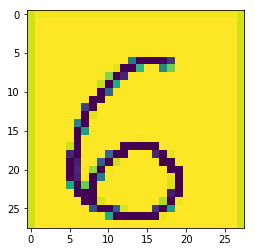

In [50]:
from skimage import io
img = io.imread('unnamed.png', as_grey=True)
from skimage.transform import resize as imresize
img = imresize(img, (28,28))
plt.imshow(img)
print(img.shape)
img = img.reshape((28*28))
t = [0]*784
for i in range(28*28):
    if img[i] == 1:
        t[i] = 1
    else:
        t[i] = 0
t = np.array(t).reshape((1,28*28))
plt.imshow(img.reshape)

In [37]:
current_prediction = session.run(prediction, feed_dict={X: img.reshape((1,28*28))})

In [38]:
current_prediction

array([[  1.9045287,  -3.627249 ,   5.5116725,  15.277622 ,  -7.9098797,
          8.731153 ,   4.331572 ,  -8.989726 ,   3.8060126, -10.708624 ]],
      dtype=float32)

## More resources:
https://www.tensorflow.org/
https://pythonprogramming.net/machine-learning-tutorial-python-introduction/
https://learningtensorflow.com/

# Thanks for coming!